In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [51]:
data=pd.read_csv('employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [52]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [53]:
data.isnull().sum(axis=0)

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [54]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [55]:
data.shape

(9, 7)

# 2. Reset the index as "name".

In [56]:
data.index

RangeIndex(start=0, stop=9, step=1)

In [57]:
data1=data.set_index('name')
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills. 

In [58]:
data.loc[[2,7]]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”. 

In [59]:
data.loc[(data['department']=='Sales')|(data['department']=='Finance')]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score. 

In [60]:
data[data['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score 

In [61]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset. 

In [62]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [63]:
data.isna()

,name,age,income,gender,department,grade,performance_score
0,False,False,True,True,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,True,False,False,False
6,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False


In [64]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [65]:
for i in ['age', 'income']:
    data[i]=data[i].fillna(data[i].median())
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,NaN,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [66]:
data['gender']=data['gender'].fillna(data['gender'].mode()[0])
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [67]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles. 9

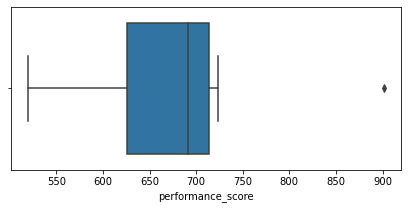

In [104]:
plt.figure(figsize=(7,3))
sns.boxplot(x=data['performance_score'])
plt.show()

In [105]:
Q1=np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2=np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3=np.percentile(data['performance_score'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_limit)
print('upper-limit : ',up_limit)

Q1 :  602.5 
Q2 :  691.5 
Q3 :  717.0
IQR :  114.5
lower-limit :  430.75
upper-limit :  888.75


In [106]:
outlier=[]
for x in data['performance_score']:
    if ((x<low_limit) or (x>up_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [901]


In [109]:
ind1 = data1['performance_score']<low_limit
data1.loc[ind1].index


Index([], dtype='object', name='name')

In [108]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding

In [87]:
data1['gender'].nunique()

2

In [88]:
gender_encode = pd.get_dummies(data1['gender'], prefix='gender', columns='gender_male', drop_first=True)
gender_encode

,gender_M
name,
Allen Smith,0
S Kumar,0
Jack Morgan,1
Ying Chin,0
Dheeraj Patel,0
Satyam Sharma,0
Josh Wills,0
Leo Duck,1


# 10. Do the standard scaling on the feature performance score. 

In [97]:
data['performance_score']

0    723
1    520
2    674
3    556
4    711
5    649
7    901
8    709
Name: performance_score, dtype: int64

In [98]:
data['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [99]:
type(data['performance_score'])

pandas.core.series.Series

In [100]:
arr=np.array(data['performance_score']).reshape(-1, 1)
arr

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [901],
       [709]], dtype=int64)

In [101]:
from sklearn import preprocessing

In [102]:
scaler=preprocessing.StandardScaler()
scaled_performance_score=pd.DataFrame(scaler.fit_transform(arr),
                                      columns=['performance_score'],
                                     index=data['name'])
scaled_performance_score

,performance_score
name,
Allen Smith,0.392262
S Kumar,-1.475872
Jack Morgan,-0.058667
Ying Chin,-1.144578
Dheeraj Patel,0.281831
Satyam Sharma,-0.288733
Josh Wills,2.030331
Leo Duck,0.263425
